<a href="https://colab.research.google.com/github/Krishan-er/Machine-Learning-Resources/blob/main/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as  pd
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow

In [2]:
import uuid
import os
import time

In [40]:
# labels = ['thumbsup', 'thumbsdown', 'thankyou', 'livelong']
labels = ['thankyou']

number_imgs = 5

## Image path

In [4]:
IMAGES_PATH = os.path.join('Tensorflow', 'workspace', 'images', 'collectedimages')


In [5]:
IMAGES_PATH

'Tensorflow/workspace/images/collectedimages'

In [6]:
if not os.path.exists(IMAGES_PATH):
    if os.name == 'posix':
        !mkdir -p {IMAGES_PATH}
    if os.name == 'nt':
         !mkdir {IMAGES_PATH}
for label in labels:
    path = os.path.join(IMAGES_PATH, label)
    if not os.path.exists(path):
        !mkdir {path}

## Capture Images

In [36]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename, quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, false);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to Tensorflow/workspace/images/collectedimages/thankyou/thankyou.56eeb878-f2f7-11ed-a33b-0242ac1c000c.jpg


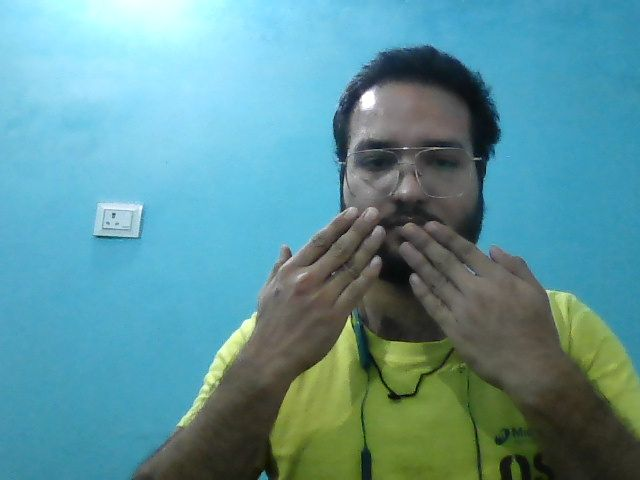

<IPython.core.display.Javascript object>

Saved to Tensorflow/workspace/images/collectedimages/thankyou/thankyou.60b94918-f2f7-11ed-a33b-0242ac1c000c.jpg


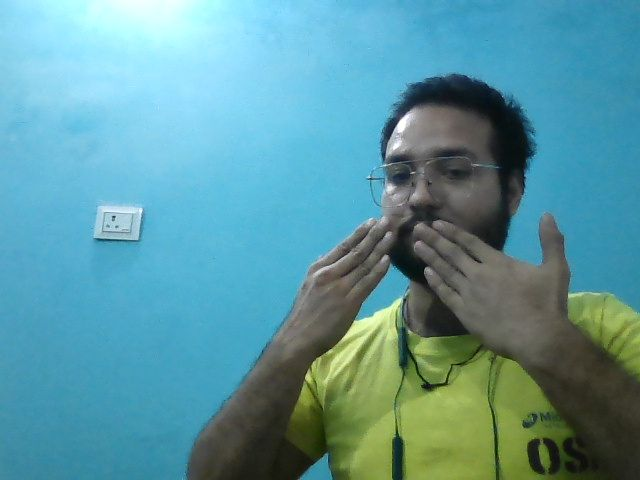

<IPython.core.display.Javascript object>

Saved to Tensorflow/workspace/images/collectedimages/thankyou/thankyou.6adbfc4c-f2f7-11ed-a33b-0242ac1c000c.jpg


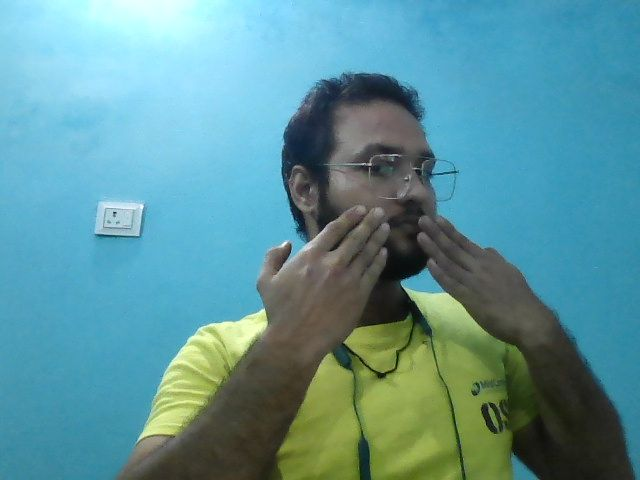

<IPython.core.display.Javascript object>

Saved to Tensorflow/workspace/images/collectedimages/thankyou/thankyou.72f1ae04-f2f7-11ed-a33b-0242ac1c000c.jpg


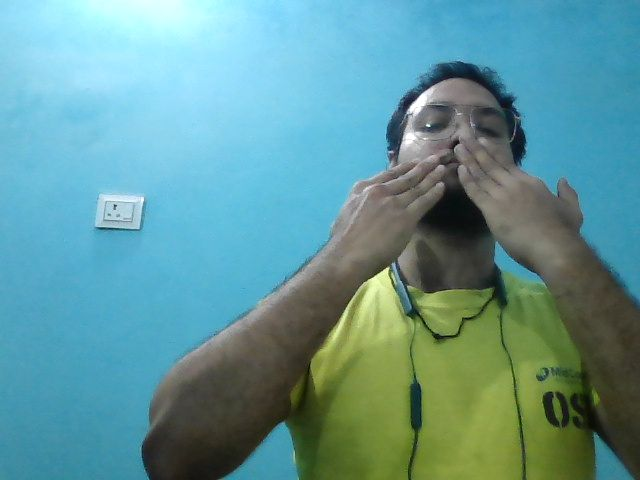

In [41]:
for label in labels:
    print('Collecting images for {}'.format(label))
    # time.sleep(5)
    for imgnum in range(number_imgs):
        try:
          imgname = os.path.join(IMAGES_PATH,label,label+'.'+'{}.jpg'.format(str(uuid.uuid1())))
          filename = take_photo(imgname)
          print('Saved to {}'.format(imgname))
          
          # Show the image which was just taken.
          display(Image(filename))
        except Exception as err:
          # Errors will be thrown if the user does not have a webcam or if they do not
          # grant the page permission to access it.
          print(str(err))
        time.sleep(2)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cv2.destroyAllWindows()